In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
'''
Part 1: UFO
'''
ufo = pd.read_csv('../data/ufo.csv')   # can also read csvs directly from the web!
ufo.head()


# 1. change the column names so that each name has no spaces
#           and all lower case

# 2. Show a bar chart of all shapes reported

# 3. Show a dataframe that only displays the reportings from Utah

# 4. Show a dataframe that only displays the reportings from Texas

# 5. Show a dataframe that only displays the reportings from Utah OR Texas

# 6. Which shape is reported most often?

# 7. Plot number of sightings per day in 2014 (days should be in order!)

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [3]:
# 1. change the column names so that each name has no spaces
#           and all lower case
ufo.rename(columns = {'Colors Reported':'colors_reported','Shape Reported':'shape_reported'}, inplace = True)
ufo.columns = map(str.lower, ufo.columns)
ufo.head(1)

,city,colors_reported,shape_reported,state,time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00


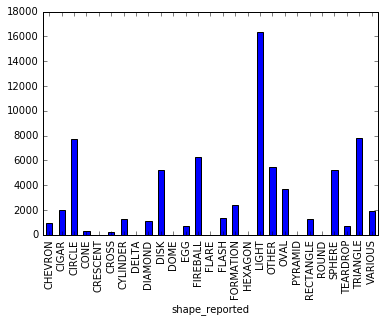

In [4]:
# 2. Show a bar chart of all shapes reported
ufo.groupby('shape_reported').shape_reported.count().plot(kind = 'bar')

In [5]:
# 3. Show a dataframe that only displays the reportings from Utah
# ufo[ufo.state == 'UT']
ufo[ufo.state == 'UT'].head()

,city,colors_reported,shape_reported,state,time
29,Ft. Duschene,NaN,DISK,UT,6/30/1944 10:00
164,Provo,BLUE,DISK,UT,7/10/1951 23:30
170,Salt Lake City,NaN,NaN,UT,1/1/1952 0:00
356,Salt Lake City,NaN,CIRCLE,UT,6/5/1956 0:00
433,Salt Lake City,NaN,DISK,UT,7/15/1957 22:00


In [6]:
# 4. Show a dataframe that only displays the reportings from Texas
# ufo[ufo.state == 'TX']
ufo[ufo.state == 'TX'].head()# saving space

,city,colors_reported,shape_reported,state,time
37,Dallas,NaN,SPHERE,TX,7/15/1945 14:00
43,Alice,NaN,DISK,TX,3/15/1946 15:30
49,Conroe,NaN,OTHER,TX,1/10/1947 20:00
92,Borger,NaN,DISK,TX,6/15/1948 16:00
114,Post,NaN,DISK,TX,9/15/1949 21:00


In [8]:
# 5. Show a dataframe that only displays the reportings from Utah OR Texas
tx = ufo['state'] == "TX"
ut = ufo['state'] == "UT" 
ufo[tx | ut].head()

# ufo[[ufo.state=='TX'] | [ufo.state=='UT']]


,city,colors_reported,shape_reported,state,time
29,Ft. Duschene,NaN,DISK,UT,6/30/1944 10:00
37,Dallas,NaN,SPHERE,TX,7/15/1945 14:00
43,Alice,NaN,DISK,TX,3/15/1946 15:30
49,Conroe,NaN,OTHER,TX,1/10/1947 20:00
92,Borger,NaN,DISK,TX,6/15/1948 16:00


In [9]:
# 6. Which shape is reported most often?
ufo.groupby('shape_reported').shape_reported.count().sort_values(ascending=False).head(1)

shape_reported
LIGHT    16332
Name: shape_reported, dtype: int64

In [10]:
# 7. Plot number of sightings per day in 2014 (days should be in order!)
# TO DO 

In [11]:
'''
Part 2: IRIS
'''

iris = pd.read_csv('../data/iris.csv')   # can also read csvs directly from the web!

# 1. Show the mean petal length by flower species

# 2. Show the mean sepal width by flower species

# 3. Use the groupby to show both #1 and #2 in one dataframe

# 4. Create a scatter plot plotting petal length against petal width
#    Use the color_flowers function to 

# 5. Show flowers with sepal length over 5 and petal length under 1.5

# 6. Show setosa flowers with petal width of exactly 0.2

# 7. Write a function to predict the species for each observation

def classify_iris(data):
    if False:
        return 'Iris-setosa'
    elif False:
        return 'Iris-versicolor'
    else:
        return 'Iris-virginica'

# example use: 
# classify_iris([0,3,2.1,3.2]) == 'Iris-virginica'
# assume the order is the same as the dataframe, so:
# [sepal_length', 'sepal_width', 'petal_length', 'petal_width']



# make predictions and store as preds
preds = iris.drop('species', axis=1).apply(classify_iris, axis = 1)


preds


# test your function: compute accuracy of your prediction
(preds == iris['species']).sum() / float(iris.shape[0])
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
# 1. Show the mean petal length by flower species
iris.groupby('species').petal_length.mean()

species
Iris-setosa        1.464
Iris-versicolor    4.260
Iris-virginica     5.552
Name: petal_length, dtype: float64

In [13]:
# 2. Show the mean sepal width by flower species
iris.groupby('species').sepal_width.mean()

species
Iris-setosa        3.418
Iris-versicolor    2.770
Iris-virginica     2.974
Name: sepal_width, dtype: float64

In [14]:
# 3. Use the groupby to show both #1 and #2 in one dataframe
temp = iris.groupby('species')
temp.aggregate(np.mean)

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


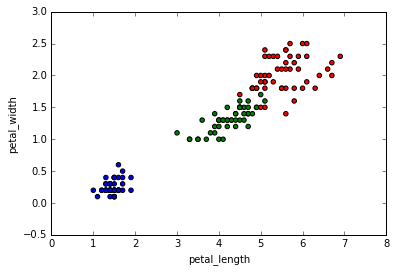

In [15]:
# 4. Create a scatter plot plotting petal length against petal width
#    Use the color_flowers function to

def color_flower(type_of_flower):
    if type_of_flower == 'Iris-setosa': 
        return 'b'
    elif type_of_flower == 'Iris-virginica':
        return 'r'
    return 'g'


# apply this function to the species column to give us 
# designated colors!

colors = iris.species.apply(color_flower)

colors


iris.plot(x='petal_length', y='petal_width', kind='scatter', c=colors)



In [16]:
# 5. Show flowers with sepal length over 5 and petal length under 1.5
# mean_sl = iris.groupby('species').sepal_length.mean()
# mean_pl = iris.groupby('species').petal_length.mean()
# d = {'mean_sl': mean_sl, 'mean_pl': mean_pl}

iris.loc[(iris['sepal_length'] > 5) & (iris['petal_length'] < 1.3)]


,sepal_length,sepal_width,petal_length,petal_width,species
14,5.8,4.0,1.2,0.2,Iris-setosa


In [17]:
# 6. Show setosa flowers with petal width of exactly 0.2
iris.loc[(iris['species'] == 'Iris-setosa') & (iris['petal_width'] == 0.2)]



,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
10,5.4,3.7,1.5,0.2,Iris-setosa
11,4.8,3.4,1.6,0.2,Iris-setosa
14,5.8,4.0,1.2,0.2,Iris-setosa


In [18]:
# 7. Write a function to predict the species for each observation

def classify_iris(data):
    pl = data[2]
    pw = data[3]
    if (pl < 2.5 and pw < 1.0):
        return 'Iris-setosa'
    elif (pl < 5.2 and pw < 1.65):
        return 'Iris-versicolor'
    else:
        return 'Iris-virginica'

# example use: 
# classify_iris(data)
# classify_iris([0,3,2.1,3.2]) == 'Iris-virginica'
# assume the order is the same as the dataframe, so:
# [sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# make predictions and store as preds
preds = iris.drop('species', axis=1).apply(classify_iris, axis = 1)

preds

# test your function: compute accuracy of your prediction
(preds == iris['species']).sum() / float(iris.shape[0])
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
'''
Part 3: FIFA GOALS
'''

goals = pd.read_csv('../data/fifa_goals.csv')
goals.sort_index(by='team1score', inplace = True)
goals.head()


# 1. Some elements in the minute column have a  '+', remove it and cast each element as an int!

# 2. Show goals scored in the first 5 minutes of a game

# 3. Show goals scored after the regulation 90 minutes is over

# 4. Show the top scoring players

# 5. Show a histogram (distribution) of minutes with 20 bins

# 6. Show a histogram of the number of goals scored by players



/Users/mcullen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,game_id,minute,player,team1score,team2score
1103,422,80,VlaoviÄ,0,2
1414,551,34,J. Cole,0,1
1423,554,60,FlÃ¡vio,0,1
1425,556,10,Å½igiÄ,0,1
1426,556,20,IliÄ,0,2


In [35]:
# 1. Some elements in the minute column have a  '+', remove it and cast each element as an int!
goals.minute = [col.strip('+') for col in goals.minute]
goals.game_id = goals.game_id.astype(int)
goals.minute = goals.minute.astype(int)
goals.team1score = goals.team1score.astype(int)
goals.team2score = goals.team2score.astype(int)
goals.head(10)

,game_id,minute,player,team1score,team2score
1103,422,80,VlaoviÄ,0,2
1414,551,34,J. Cole,0,1
1423,554,60,FlÃ¡vio,0,1
1425,556,10,Å½igiÄ,0,1
1426,556,20,IliÄ,0,2
1430,557,26,Materazzi,0,1
1431,557,87,Inzaghi,0,2
1444,561,36,Juanito,0,1
1446,563,55,Vieira,0,1
1447,563,61,Henry,0,2


In [41]:
# 2. Show goals scored in the first 5 minutes of a game
goals.loc[(goals['minute'] < 5)].head()

,game_id,minute,player,team1score,team2score
1505,591,3,PetrÃ¡Å¡,0,1
404,130,1,Park Seung-jin,0,1
488,217,4,VujadinoviÄ,0,1
536,238,2,ButragueÃ±o,0,1
1350,524,4,Pauleta,0,1


In [43]:
# 3. Show goals scored after the regulation 90 minutes is over
goals.loc[(goals['minute'] > 90)].head()

,game_id,minute,player,team1score,team2score
1471,577,119,Grosso,0,1
1472,577,120,Del Piero,0,2
2057,806,94,Ä°lhan [Golden Goal],0,1
1198,463,106,Milla,1,0
1215,470,119,Platt,1,0


In [47]:
# 4. Show the top scoring players
goals.groupby('player').player.count().sort_values(ascending=False).head(10)

player
MÃ¼ller      20
Klose        14
Ronaldo      14
Fontaine     13
PelÃ©        12
Kocsis       11
Klinsmann    11
Lato         10
Rahn         10
Ademir        9
Name: player, dtype: int64

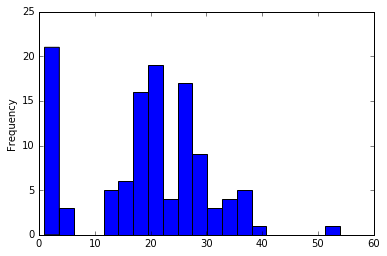

In [49]:
# 5. Show a histogram (distribution) of minutes with 20 bins
goals.groupby('minute').minute.count().plot.hist(20)


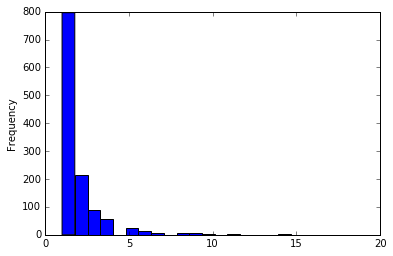

In [53]:
# 6. Show a histogram of the number of goals scored by players
goals.groupby('player').player.count().plot.hist(25)